In [2]:
import h5py as h5
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
%matplotlib inline

In [3]:
# given the position and masses of the particles, finds their center of mass
def findCenterMass(r,m):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(r[:,i]*m[:])/np.sum(m[:])
    return com

# Takes every row in d(an array with zeroes) and gives out ds(distance between the Com and BH)
def Distance(cm,bh):
    d = np.zeros((402,1))                  #creates a column with 401 elements of zeroes
    for row in d:                          #for every row of d it calculates the dx,dy and dz of each row 
        dx = bh[:,0]-cm[:,0]
        dy = bh[:,1]-cm[:,1]
        dz = bh[:,2]-cm[:,2]
        
        ds = np.sqrt(dx**2 + dy**2 +dz**2) #ds is calculated for each row and put back into d
    return ds

def Distance2(cm,bh):
    #for every row of d it calculates the dx,dy and dz of each row 
    dx = bh[0]-cm[:,0]
    dy = bh[1]-cm[:,1]
    dz = bh[2]-cm[:,2]
        
    ds = np.sqrt(dx**2 + dy**2 +dz**2) #ds is calculated for each row 
    return ds

# Gas forming Stars Histogram Plot Files Video

In [ ]:
end = 402.0
snap = np.arange(0.0,end)

for x in (snap):
    print x
    if x == 0.0:
        filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/Merger/data/snapshot_%03d/snap_%03d.hdf5" %(x,x),'r')
        header = filein['Header']
        gas = filein['PartType0']
        stars = filein['PartType2']
        g_positions = np.asarray(gas['Coordinates'])
        s_positions = np.asarray(stars['Coordinates'])
        g_mass = np.asarray(gas['Mass'])
        s_mass = np.ones(500000)*(header.attrs.__getitem__('MassTable')[2])
        BH = filein['PartType5']
        BH_positions = np.asarray(BH['Coordinates'])
        sfr2 = np.asarray(gas['StarFormationRate'])
        gx = g_positions[:,0] / 0.73
        gy = g_positions[:,1] / 0.73
        gz = g_positions[:,2] / 0.73
        pos = g_positions
        sfr = sfr2[(sfr2>0)]
        pos = pos[(sfr2>0)] - findCenterMass(np.concatenate((s_positions,g_positions),axis=0),np.concatenate((s_mass,g_mass),axis=0))
        bhx = BH_positions[:,0] / 0.73
        bhy = BH_positions[:,1] / 0.73
        bhz = BH_positions[:,2] / 0.73
        sx = s_positions[:,0] / 0.73
        sy = s_positions[:,1] / 0.73
        sz = s_positions[:,2] / 0.73
        px = pos[:,0] / 0.73
        py = pos[:,1] / 0.73
        pz = pos[:,2] / 0.73
        
        
        nbins = 800
        xmin = -40
        xmax = 40
        ymin = -40
        ymax = 40

        H, xedges, yedges = np.histogram2d(px,py,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        # Plot 2D histogram using pcolor, pcolormesh shows actual edges
        
        fig = plt.figure(figsize=(18,18))
        plt.pcolormesh(xedges,yedges,Hmasked)
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
        plt.xlim(-15,15)
        plt.ylim(-15,15)
        plt.title('Gas forming into Stars', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,6,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
        number = '%03d'%x
        plt.savefig('histfile'+number+'.png')
       

    else:
        filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/Merger/data/snapshot_%03d/snap_%03d.hdf5" %(x,x),'r')
    
        header = filein['Header']
        gas = filein['PartType0']
        stars = filein['PartType2']
        nstars = filein['PartType4']
        g_positions = np.asarray(gas['Coordinates'])
        s_positions = np.asarray(stars['Coordinates'])
        n_positions = np.asarray(nstars['Coordinates'])
        g_mass = np.asarray(gas['Mass'])
        n_mass = np.asarray(nstars['Mass'])
        s_mass = np.ones(500000)*(header.attrs.__getitem__('MassTable')[2])
        BH = filein['PartType5']
        BH_positions = np.asarray(BH['Coordinates'])
        sfr2 = np.asarray(gas['StarFormationRate'])
    
        Gcom = findCenterMass(s_positions,s_mass)
        
        s_positions = s_positions - Gcom
        BH_positions = BH_positions - Gcom
        pos = g_positions    
        sfr = sfr2[(sfr2>0)]
        pos = pos[(sfr2>0)]
        gasm = g_mass[(sfr2>0)]
        
        pos = pos - findCenterMass(pos,gasm)
        
        bhx = BH_positions[:,0] / 0.73
        bhy = BH_positions[:,1] / 0.73
        bhz = BH_positions[:,2] / 0.73
        gx = g_positions[:,0] / 0.73
        gy = g_positions[:,1] / 0.73
        gz = g_positions[:,2] / 0.73
        sx = s_positions[:,0] / 0.73
        sy = s_positions[:,1] / 0.73
        sz = s_positions[:,2] / 0.73
        px = pos[:,0] / 0.73
        py = pos[:,1] / 0.73
        pz = pos[:,2] / 0.73
        
        nbins = 800
        xmin = -40
        xmax = 40
        ymin = -40
        ymax = 40

        H, xedges, yedges = np.histogram2d(px,py,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        # Plot 2D histogram using pcolor, pcolormesh shows actual edges
        
        fig = plt.figure(figsize=(18,18))
        plt.pcolormesh(xedges,yedges,Hmasked)
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
        plt.title('Gas forming into Stars', fontsize=25, y=1.02)
        plt.xlim(-15,15)
        plt.ylim(-15,15)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,6,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
        number = '%03d'%x
        plt.savefig('histfile'+number+'.png')

# Big 2D Histo for Stars and Gas Video

In [ ]:
end = 402.0
snap = np.arange(0.0,end)
%timeit
for x in (snap):
    print x
    if x == 0.0:
        filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/Merger/data/snapshot_%03d/snap_%03d.hdf5" %(x,x),'r')
        header = filein['Header']
        gas = filein['PartType0']
        stars = filein['PartType2']
        g_positions = np.asarray(gas['Coordinates'])
        s_positions = np.asarray(stars['Coordinates'])
        g_mass = np.asarray(gas['Mass'])
        s_mass = np.ones(500000)*(header.attrs.__getitem__('MassTable')[2])
        BH = filein['PartType5']
        BH_positions = np.asarray(BH['Coordinates'])
        sfr2 = np.asarray(gas['StarFormationRate'])
        gx = g_positions[:,0] / 0.73
        gy = g_positions[:,1] / 0.73
        gz = g_positions[:,2] / 0.73
        pos = g_positions
        sfr = sfr2[(sfr2>0)]
        pos = pos[(sfr2>0)] - findCenterMass(np.concatenate((s_positions,g_positions),axis=0),np.concatenate((s_mass,g_mass),axis=0))
        bhx = BH_positions[:,0] / 0.73
        bhy = BH_positions[:,1] / 0.73
        bhz = BH_positions[:,2] / 0.73
        sx = s_positions[:,0] / 0.73
        sy = s_positions[:,1] / 0.73
        sz = s_positions[:,2] / 0.73
        px = pos[:,0] / 0.73
        py = pos[:,1] / 0.73
        pz = pos[:,2] / 0.73


#######################################################################################################################        

        nbins = 800
        xmin = -40
        xmax = 40
        ymin = -40
        ymax = 40

        
        # Plot 2D histogram using pcolor, pcolormesh shows actual edges
        
        fig = plt.figure(figsize=(20,20))
        gs = gridspec.GridSpec(2, 2)

        H, xedges, yedges = np.histogram2d(gx,gy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(221)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=2,vmax=7))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
        plt.xlim(-40,40)
        plt.ylim(-40,40)
        plt.title('Gas', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,32,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 800
        xmin = -40
        xmax = 40
        ymin = -40
        ymax = 40
        
        
        H, xedges, yedges = np.histogram2d(gx,gz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(222)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=2,vmax=7))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
        plt.title('Gas', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,32,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 800
        xmin = -40
        xmax = 40
        ymin = -40
        ymax = 40
        
        G, xedges, yedges = np.histogram2d(sx,sy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(223)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=2,vmax=7))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
        plt.title('Stars', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(1,16,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)      
#######################################################################################################################                

        nbins = 800
        xmin = -40
        xmax = 40
        ymin = -40
        ymax = 40   
        G, xedges, yedges = np.histogram2d(sx,sz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(224)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=2,vmax=7))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
        plt.title('Stars', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(1,16,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################        
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.25)
        number = '%03d'%x
        plt.savefig('bigfile'+number+'.png')
    else:
        filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/Merger/data/snapshot_%03d/snap_%03d.hdf5" %(x,x),'r')
    
        header = filein['Header']
        gas = filein['PartType0']
        stars = filein['PartType2']
        nstars = filein['PartType4']
        g_positions = np.asarray(gas['Coordinates'])
        s_positions = np.asarray(stars['Coordinates'])
        n_positions = np.asarray(nstars['Coordinates'])
        g_mass = np.asarray(gas['Mass'])
        n_mass = np.asarray(nstars['Mass'])
        s_mass = np.ones(500000)*(header.attrs.__getitem__('MassTable')[2])
        BH = filein['PartType5']
        BH_positions = np.asarray(BH['Coordinates'])
        sfr2 = np.asarray(gas['StarFormationRate'])
    
        Gcom = findCenterMass(s_positions,s_mass)
        
        s_positions = s_positions - Gcom
        BH_positions = BH_positions - Gcom
        n_positions = n_positions - findCenterMass(n_positions,n_mass)
        pos = g_positions
        g_positions = g_positions - findCenterMass(g_positions,g_mass)
        pos = pos[(sfr2>0)] - findCenterMass(np.concatenate((s_positions,g_positions),axis=0),np.concatenate((s_mass,g_mass),axis=0))
        
        bhx = BH_positions[:,0] / 0.73
        bhy = BH_positions[:,1] / 0.73
        bhz = BH_positions[:,2] / 0.73
        gx = g_positions[:,0] / 0.73
        gy = g_positions[:,1] / 0.73
        gz = g_positions[:,2] / 0.73
        sx = s_positions[:,0] / 0.73
        sy = s_positions[:,1] / 0.73
        sz = s_positions[:,2] / 0.73
        nx = n_positions [:,0] / 0.73
        ny = n_positions [:,1] / 0.73
        nz = n_positions[:,2] / 0.73
        px = pos[:,0] / 0.73
        py = pos[:,1] / 0.73
        pz = pos[:,2] / 0.73
        
        
        starry = np.concatenate((s_positions,n_positions), axis=0) - findCenterMass(np.concatenate((s_positions,n_positions),axis=0),np.concatenate((s_mass,n_mass),axis=0))
        starryx = starry[:,0]
        starryy = starry[:,1]
        starryz = starry[:,2]
        
        fig = plt.figure(figsize=(20,20))
        
#######################################################################################################################                
   
        nbins = 800
        xmin = -40
        xmax = 40
        ymin = -40
        ymax = 40

        
        H, xedges, yedges = np.histogram2d(gx,gy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(221)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=2,vmax=7))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
        plt.xlim(-40,40)
        plt.ylim(-40,40)
        plt.title('Gas', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,32,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################                
        
        nbins = 800
        xmin = -40
        xmax = 40
        ymin = -40
        ymax = 40
        
        H, xedges, yedges = np.histogram2d(gx,gz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(222)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=2,vmax=7))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
        plt.xlim(-40,40)
        plt.ylim(-40,40)
        plt.title('Gas', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,32,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################                 
        
        nbins = 800
        xmin = -40
        xmax = 40
        ymin = -40
        ymax = 40
        
        G, xedges, yedges = np.histogram2d(starryx,starryy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(223)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=2,vmax=7))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
        plt.title('Stars', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,16,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################                
        
        nbins = 800
        xmin = -40
        xmax = 40
        ymin = -40
        ymax = 40
        
        G, xedges, yedges = np.histogram2d(starryx,starryz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(224)
        plt.pcolormesh(xedges,yedges,Gmasked, norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=2,vmax=7))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
        plt.title('Stars', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(1,16,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################                
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.25)  
#         gs.update(wspace=0.05, hspace=0.1)
#         fig.tight_layout()
        number = '%03d'%x
        plt.savefig('bigfile'+number+'.png')

# Big 2D Histo File with Zoom into Stars Region

In [ ]:
end = 402.0
snap = np.arange(0.0,end)
for x in (snap):
    print x
    if x == 0.0:
        filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/Merger/data/snapshot_%03d/snap_%03d.hdf5" %(x,x),'r')
        header = filein['Header']
        gas = filein['PartType0']
        stars = filein['PartType2']
        g_positions = np.asarray(gas['Coordinates'])
        s_positions = np.asarray(stars['Coordinates'])
        g_mass = np.asarray(gas['Mass'])
        s_mass = np.ones(500000)*(header.attrs.__getitem__('MassTable')[2])
        BH = filein['PartType5']
        BH_positions = np.asarray(BH['Coordinates'])
        sfr2 = np.asarray(gas['StarFormationRate'])
        gx = g_positions[:,0] / 0.73
        gy = g_positions[:,1] / 0.73
        gz = g_positions[:,2] / 0.73
        pos = g_positions
        sfr = sfr2[(sfr2>0)]
        pos = pos[(sfr2>0)] - findCenterMass(np.concatenate((s_positions,g_positions),axis=0),np.concatenate((s_mass,g_mass),axis=0))
        bhx = BH_positions[:,0] / 0.73
        bhy = BH_positions[:,1] / 0.73
        bhz = BH_positions[:,2] / 0.73
        sx = s_positions[:,0] / 0.73
        sy = s_positions[:,1] / 0.73
        sz = s_positions[:,2] / 0.73
        px = pos[:,0] / 0.73
        py = pos[:,1] / 0.73
        pz = pos[:,2] / 0.73


#######################################################################################################################        

        nbins = 800
        xmin = -20
        xmax = 20
        ymin = -20
        ymax = 20

        
        # Plot 2D histogram using pcolor, pcolormesh shows actual edges
        
        fig = plt.figure(figsize=(20,20))
        gs = gridspec.GridSpec(2, 2)

        H, xedges, yedges = np.histogram2d(gx,gy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(221)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=2,vmax=7))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
#         plt.xlim(-40,40)
#         plt.ylim(-40,40)
        plt.title('Gas', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,15,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 800
        xmin = -20
        xmax = 20
        ymin = -20
        ymax = 20
        
        
        H, xedges, yedges = np.histogram2d(gx,gz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(222)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=2,vmax=7))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
        plt.title('Gas', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,15,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 800
        xmin = -20
        xmax = 20
        ymin = -20
        ymax = 20
        
        G, xedges, yedges = np.histogram2d(sx,sy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(223)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=2,vmax=7))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
        plt.title('Stars', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(1,16,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)      
#######################################################################################################################                

        nbins = 800
        xmin = -20
        xmax = 20
        ymin = -20
        ymax = 20   
        G, xedges, yedges = np.histogram2d(sx,sz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(224)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=2,vmax=7))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
        plt.title('Stars', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(1,16,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################        
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.25)
        number = '%03d'%x
        plt.savefig('smallfile'+number+'.png')
    else:
        filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/Merger/data/snapshot_%03d/snap_%03d.hdf5" %(x,x),'r')
    
        header = filein['Header']
        gas = filein['PartType0']
        stars = filein['PartType2']
        nstars = filein['PartType4']
        g_positions = np.asarray(gas['Coordinates'])
        s_positions = np.asarray(stars['Coordinates'])
        n_positions = np.asarray(nstars['Coordinates'])
        g_mass = np.asarray(gas['Mass'])
        n_mass = np.asarray(nstars['Mass'])
        s_mass = np.ones(500000)*(header.attrs.__getitem__('MassTable')[2])
        BH = filein['PartType5']
        BH_positions = np.asarray(BH['Coordinates'])
        sfr2 = np.asarray(gas['StarFormationRate'])
    
        Gcom = findCenterMass(s_positions,s_mass)
        
        s_positions = s_positions - Gcom
        BH_positions = BH_positions - Gcom
        n_positions = n_positions - findCenterMass(n_positions,n_mass)
        pos = g_positions
        g_positions = g_positions - findCenterMass(g_positions,g_mass)
        pos = pos[(sfr2>0)] - findCenterMass(np.concatenate((s_positions,g_positions),axis=0),np.concatenate((s_mass,g_mass),axis=0))
        
        bhx = BH_positions[:,0] / 0.73
        bhy = BH_positions[:,1] / 0.73
        bhz = BH_positions[:,2] / 0.73
        gx = g_positions[:,0] / 0.73
        gy = g_positions[:,1] / 0.73
        gz = g_positions[:,2] / 0.73
        sx = s_positions[:,0] / 0.73
        sy = s_positions[:,1] / 0.73
        sz = s_positions[:,2] / 0.73
        nx = n_positions [:,0] / 0.73
        ny = n_positions [:,1] / 0.73
        nz = n_positions[:,2] / 0.73
        px = pos[:,0] / 0.73
        py = pos[:,1] / 0.73
        pz = pos[:,2] / 0.73
        
        
        starry = np.concatenate((s_positions,n_positions), axis=0) - findCenterMass(np.concatenate((s_positions,n_positions),axis=0),np.concatenate((s_mass,n_mass),axis=0))
        starryx = starry[:,0]
        starryy = starry[:,1]
        starryz = starry[:,2]
        
        fig = plt.figure(figsize=(20,20))
        
#######################################################################################################################                
   
        nbins = 800
        xmin = -20
        xmax = 20
        ymin = -20
        ymax = 20

        
        H, xedges, yedges = np.histogram2d(gx,gy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(221)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=2,vmax=7))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
#         plt.xlim(-40,40)
#         plt.ylim(-40,40)
        plt.title('Gas', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,15,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################                
        
        nbins = 800
        xmin = -20
        xmax = 20
        ymin = -20
        ymax = 20
        
        H, xedges, yedges = np.histogram2d(gx,gz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(222)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=2,vmax=7))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.xlim(-40,40)
#         plt.ylim(-40,40)
        plt.title('Gas', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,15,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################                 
        
        nbins = 800
        xmin = -20
        xmax = 20
        ymin = -20
        ymax = 20
        
        G, xedges, yedges = np.histogram2d(starryx,starryy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(223)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=2,vmax=7))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
        plt.title('Stars', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,16,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################                
        
        nbins = 800
        xmin = -20
        xmax = 20
        ymin = -20
        ymax = 20
        
        G, xedges, yedges = np.histogram2d(starryx,starryz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]])
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(224)
        plt.pcolormesh(xedges,yedges,Gmasked, norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=2,vmax=7))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
        plt.title('Stars', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(1,16,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################                
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.25)  
#         gs.update(wspace=0.05, hspace=0.1)
#         fig.tight_layout()
        number = '%03d'%x
        plt.savefig('smallfile'+number+'.png')

# Mass Weighted Histo Video

In [ ]:
end = 403.0
snap = np.arange(0.0,end)
for x in (snap):
    print x
    if x == 0.0:
        filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/Merger/data/snapshot_%03d/snap_%03d.hdf5" %(x,x),'r')
        header = filein['Header']
        gas = filein['PartType0']
        stars = filein['PartType2']
        g_positions = np.asarray(gas['Coordinates'])
        s_positions = np.asarray(stars['Coordinates'])
        g_mass = np.asarray(gas['Mass'])
        s_mass = np.ones(500000)*(header.attrs.__getitem__('MassTable')[2])
        BH = filein['PartType5']
        BH_positions = np.asarray(BH['Coordinates'])
        sfr2 = np.asarray(gas['StarFormationRate'])
        gx = g_positions[:,0] / 0.73
        gy = g_positions[:,1] / 0.73
        gz = g_positions[:,2] / 0.73
        pos = g_positions
        sfr = sfr2[(sfr2>0)]
        pos = pos[(sfr2>0)] - findCenterMass(np.concatenate((s_positions,g_positions),axis=0),np.concatenate((s_mass,g_mass),axis=0))
        bhx = BH_positions[:,0] / 0.73
        bhy = BH_positions[:,1] / 0.73
        bhz = BH_positions[:,2] / 0.73
        sx = s_positions[:,0] / 0.73
        sy = s_positions[:,1] / 0.73
        sz = s_positions[:,2] / 0.73
        px = pos[:,0] / 0.73
        py = pos[:,1] / 0.73
        pz = pos[:,2] / 0.73

        
#######################################################################################################################        

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10

        
        # Plot 2D histogram using pcolor, pcolormesh shows actual edges
        
        fig = plt.figure(figsize=(14,14))
        gs = gridspec.GridSpec(2, 2)

        H, xedges, yedges = np.histogram2d(gx,gy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= g_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(221)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4,vmax=-1.8))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
#         plt.xlim(-40,40)
#         plt.ylim(-40,40)
        plt.title('Gas', fontsize=22,x=1.08, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,10.2,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 18)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('$Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
#         font_size = 20 # Adjust as appropriate.
#         cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10
        
        
        H, xedges, yedges = np.histogram2d(gx,gz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights = g_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(222)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4,vmax=-1.8))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.title('Gas', fontsize=25,x=1.08, y=1.02)
        plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,10.2,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 18)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Mass$ $per$ $kpc$ $^{2}$', fontsize= 22)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        BH_positions = BH_positions + findCenterMass(g_positions,g_mass) - findCenterMass(s_positions,s_mass)
        bhx = BH_positions[:,0]
        bhy = BH_positions[:,1]
        bhz = BH_positions[:,2]
    
        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10
        
        G, xedges, yedges = np.histogram2d(sx,sy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights = s_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(223)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4,vmax=-1.8))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
        plt.title('Stars', fontsize=22,x=1.08, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(1.5,9,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 18)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('$Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
#         font_size = 20 # Adjust as appropriate.
#         cbar.ax.tick_params(labelsize=font_size)      
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10   
        G, xedges, yedges = np.histogram2d(sx,sz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= s_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(224)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4,vmax=-1.8))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.title('Stars', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(0,9,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 18)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Mass$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################        
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.25)
        number = '%03d'%x
        plt.savefig('binfile'+number+'.png')
    else:
        filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/Merger/data/snapshot_%03d/snap_%03d.hdf5" %(x,x),'r')
    
        header = filein['Header']
        gas = filein['PartType0']
        stars = filein['PartType2']
        nstars = filein['PartType4']
        g_positions = np.asarray(gas['Coordinates'])
        s_positions = np.asarray(stars['Coordinates'])
        n_positions = np.asarray(nstars['Coordinates'])
        g_mass = np.asarray(gas['Mass'])
        n_mass = np.asarray(nstars['Mass'])
        s_mass = np.ones(500000)*(header.attrs.__getitem__('MassTable')[2])
        BH = filein['PartType5']
        BH_mass = np.asarray(BH['BH_Mass'])
        BH_positions = np.asarray(BH['Coordinates'])
        sfr2 = np.asarray(gas['StarFormationRate'])
    
        Gcom = findCenterMass(s_positions,s_mass)
        
        s_positions = s_positions - Gcom
        BH_positions = BH_positions - findCenterMass(g_positions,g_mass)
        n_positions = n_positions - findCenterMass(n_positions,n_mass)
        pos = g_positions
        g_positions = g_positions - findCenterMass(g_positions,g_mass)
        pos = pos[(sfr2>0)] - findCenterMass(np.concatenate((s_positions,g_positions),axis=0),np.concatenate((s_mass,g_mass),axis=0))
        
        bhx = BH_positions[:,0] / 0.73
        bhy = BH_positions[:,1] / 0.73
        bhz = BH_positions[:,2] / 0.73
        gx = g_positions[:,0] / 0.73
        gy = g_positions[:,1] / 0.73
        gz = g_positions[:,2] / 0.73
        sx = s_positions[:,0] / 0.73
        sy = s_positions[:,1] / 0.73
        sz = s_positions[:,2] / 0.73
        nx = n_positions [:,0] / 0.73
        ny = n_positions [:,1] / 0.73
        nz = n_positions[:,2] / 0.73
        px = pos[:,0] / 0.73
        py = pos[:,1] / 0.73
        pz = pos[:,2] / 0.73
        
        
        starry = np.concatenate((s_positions,n_positions), axis=0) - findCenterMass(np.concatenate((s_positions,n_positions),axis=0),np.concatenate((s_mass,n_mass),axis=0))
        starryx = starry[:,0]
        starryy = starry[:,1]
        starryz = starry[:,2]
        
        fig = plt.figure(figsize=(14,14))
        print fig
#######################################################################################################################        

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10

        
        # Plot 2D histogram using pcolor, pcolormesh shows actual edges
        
        fig = plt.figure(figsize=(14,14))
        gs = gridspec.GridSpec(2, 2)

        H, xedges, yedges = np.histogram2d(gx,gy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= g_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(221)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4,vmax=-1.8))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
#         plt.xlim(-40,40)
#         plt.ylim(-40,40)
        plt.title('Gas', fontsize=22,x=1.08, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,10.2,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 18)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('$Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
#         font_size = 20 # Adjust as appropriate.
#         cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10
        
        
        H, xedges, yedges = np.histogram2d(gx,gz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights = g_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(222)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4,vmax=-1.8))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.title('Gas', fontsize=25,x=1.08, y=1.02)
        plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,10.2,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 18)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Mass$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        BH_positions = BH_positions + (findCenterMass(g_positions,g_mass)) - (findCenterMass(s_positions,s_mass))
        bhx = BH_positions[:,0]
        bhy = BH_positions[:,1]
        bhz = BH_positions[:,2]
        
        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10
        
        G, xedges, yedges = np.histogram2d(starryx,starryy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights = np.concatenate((s_mass,n_mass),axis=0))
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(223)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4,vmax=-1.8))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
        plt.title('Stars', fontsize=22,x=1.08, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(1.5,9,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 18)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('$Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
#         font_size = 20 # Adjust as appropriate.
#         cbar.ax.tick_params(labelsize=font_size)      
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10   
        G, xedges, yedges = np.histogram2d(starryx,starryz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= np.concatenate((s_mass,n_mass),axis=0))
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(224)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4,vmax=-1.8))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.title('Stars', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(0,9,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 18)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Mass$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################        
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.25)
        number = '%03d'%x
        plt.savefig('binfile'+number+'.png')

0.0


/mnt/xfs1/scda_software/pkg/devel/python/2.7.12/lib/python2.7/site-packages/ipykernel/__main__.py:54: RuntimeWarning: divide by zero encountered in log10
/mnt/xfs1/scda_software/pkg/devel/python/2.7.12/lib/python2.7/site-packages/ipykernel/__main__.py:90: RuntimeWarning: divide by zero encountered in log10
/mnt/xfs1/scda_software/pkg/devel/python/2.7.12/lib/python2.7/site-packages/ipykernel/__main__.py:128: RuntimeWarning: divide by zero encountered in log10
/mnt/xfs1/scda_software/pkg/devel/python/2.7.12/lib/python2.7/site-packages/ipykernel/__main__.py:160: RuntimeWarning: divide by zero encountered in log10


1.0
Figure(1008x1008)


/mnt/xfs1/scda_software/pkg/devel/python/2.7.12/lib/python2.7/site-packages/ipykernel/__main__.py:254: RuntimeWarning: divide by zero encountered in log10
/mnt/xfs1/scda_software/pkg/devel/python/2.7.12/lib/python2.7/site-packages/ipykernel/__main__.py:290: RuntimeWarning: divide by zero encountered in log10
/mnt/xfs1/scda_software/pkg/devel/python/2.7.12/lib/python2.7/site-packages/ipykernel/__main__.py:328: RuntimeWarning: divide by zero encountered in log10
/mnt/xfs1/scda_software/pkg/devel/python/2.7.12/lib/python2.7/site-packages/ipykernel/__main__.py:360: RuntimeWarning: divide by zero encountered in log10


2.0
Figure(1008x1008)
3.0
Figure(1008x1008)
4.0
Figure(1008x1008)
5.0
Figure(1008x1008)
6.0
Figure(1008x1008)
7.0
Figure(1008x1008)
8.0
Figure(1008x1008)
9.0
Figure(1008x1008)
10.0
Figure(1008x1008)


/scda/pkg/devel/python/2.7.12/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


11.0
Figure(1008x1008)
12.0
Figure(1008x1008)
13.0
Figure(1008x1008)
14.0
Figure(1008x1008)
15.0
Figure(1008x1008)
16.0
Figure(1008x1008)
17.0
Figure(1008x1008)
18.0
Figure(1008x1008)
19.0
Figure(1008x1008)
20.0
Figure(1008x1008)
21.0
Figure(1008x1008)
22.0
Figure(1008x1008)
23.0
Figure(1008x1008)
24.0
Figure(1008x1008)
25.0
Figure(1008x1008)
26.0
Figure(1008x1008)
27.0
Figure(1008x1008)
28.0
Figure(1008x1008)
29.0
Figure(1008x1008)
30.0
Figure(1008x1008)
31.0
Figure(1008x1008)
32.0
Figure(1008x1008)
33.0
Figure(1008x1008)
34.0
Figure(1008x1008)
35.0
Figure(1008x1008)
36.0
Figure(1008x1008)
37.0
Figure(1008x1008)
38.0
Figure(1008x1008)
39.0
Figure(1008x1008)
40.0
Figure(1008x1008)
41.0
Figure(1008x1008)
42.0
Figure(1008x1008)
43.0
Figure(1008x1008)
44.0
Figure(1008x1008)
45.0
Figure(1008x1008)
46.0
Figure(1008x1008)
47.0
Figure(1008x1008)
48.0
Figure(1008x1008)
49.0
Figure(1008x1008)
50.0
Figure(1008x1008)
51.0
Figure(1008x1008)
52.0
Figure(1008x1008)
53.0
Figure(1008x1008)
54.0
Figure

# SFR Weighted and Gas

In [ ]:
end = 402.0
snap = np.arange(0.0,end)
for x in (snap):
    print x
    if x == 0.0:
        filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/Merger/data/snapshot_%03d/snap_%03d.hdf5" %(x,x),'r')
        header = filein['Header']
        gas = filein['PartType0']
        stars = filein['PartType2']
        g_positions = np.asarray(gas['Coordinates'])
        s_positions = np.asarray(stars['Coordinates'])
        g_mass = np.asarray(gas['Mass'])
        s_mass = np.ones(500000)*(header.attrs.__getitem__('MassTable')[2])
        BH = filein['PartType5']
        BH_positions = np.asarray(BH['Coordinates'])
        sfr2 = np.asarray(gas['StarFormationRate'])
        gx = g_positions[:,0] / 0.73
        gy = g_positions[:,1] / 0.73
        gz = g_positions[:,2] / 0.73
        pos = g_positions
        sfr = sfr2[(sfr2>0)]
        pos = pos[(sfr2>0)] - findCenterMass(np.concatenate((s_positions,g_positions),axis=0),np.concatenate((s_mass,g_mass),axis=0))
        bhx = BH_positions[:,0] / 0.73
        bhy = BH_positions[:,1] / 0.73
        bhz = BH_positions[:,2] / 0.73
        sx = s_positions[:,0] / 0.73
        sy = s_positions[:,1] / 0.73
        sz = s_positions[:,2] / 0.73
        px = pos[:,0] / 0.73
        py = pos[:,1] / 0.73
        pz = pos[:,2] / 0.73

        
#######################################################################################################################        

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10

        
        # Plot 2D histogram using pcolor, pcolormesh shows actual edges
        
        fig = plt.figure(figsize=(20,20))
        gs = gridspec.GridSpec(2, 2)

        H, xedges, yedges = np.histogram2d(gx,gy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= sfr2)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(221)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-4.8, vmax=-1.2))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
#         plt.xlim(-15,15)
#         plt.ylim(-15,15)
        plt.title('Gas', fontsize=29,x=1.07, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,7,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('$log$ $SFR$ $per$ $kpc$ $^{2}$', fontsize= 28)
#         font_size = 20 # Adjust as appropriate.
#         cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10
        
        
        H, xedges, yedges = np.histogram2d(gx,gz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights = sfr2)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(222)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-4.8, vmax=-1.2))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.xlim(-15,15)
#         plt.ylim(-15,15)
#         plt.title('Gas', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,7,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $SFR$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10
        
        G, xedges, yedges = np.histogram2d(gx,gy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= g_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(223)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4, vmax=-2.2))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
#         plt.title('Gas', fontsize=25, x=1.08, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(7,10.5,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('$Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
#         font_size = 20 # Adjust as appropriate.
#         cbar.ax.tick_params(labelsize=font_size)      
# #######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10  
        
        G, xedges, yedges = np.histogram2d(gx,gz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= g_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(224)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4, vmax=-2.2))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.title('Stars(SFR Weighted)', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(7,10.5,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Mass$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################        
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.15)
#         fig.tight_layout()
        number = '%03d'%x
        plt.savefig('sfrbinfile'+number+'.png')
    else:
        filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/Merger/data/snapshot_%03d/snap_%03d.hdf5" %(x,x),'r')
    
        header = filein['Header']
        gas = filein['PartType0']
        stars = filein['PartType2']
        nstars = filein['PartType4']
        g_positions = np.asarray(gas['Coordinates'])
        s_positions = np.asarray(stars['Coordinates'])
        n_positions = np.asarray(nstars['Coordinates'])
        g_mass = np.asarray(gas['Mass'])
        n_mass = np.asarray(nstars['Mass'])
        s_mass = np.ones(500000)*(header.attrs.__getitem__('MassTable')[2])
        BH = filein['PartType5']
        BH_positions = np.asarray(BH['Coordinates'])
        sfr2 = np.asarray(gas['StarFormationRate'])
    
        Gcom = findCenterMass(s_positions,s_mass)
        
        s_positions = s_positions - Gcom
        BH_positions = BH_positions - Gcom
        n_positions = n_positions - findCenterMass(n_positions,n_mass)
        pos = g_positions
        g_positions = g_positions - findCenterMass(g_positions,g_mass)
        pos = pos[(sfr2>0)] - findCenterMass(np.concatenate((s_positions,g_positions),axis=0),np.concatenate((s_mass,g_mass),axis=0))
        
        bhx = BH_positions[:,0] / 0.73
        bhy = BH_positions[:,1] / 0.73
        bhz = BH_positions[:,2] / 0.73
        gx = g_positions[:,0] / 0.73
        gy = g_positions[:,1] / 0.73
        gz = g_positions[:,2] / 0.73
        sx = s_positions[:,0] / 0.73
        sy = s_positions[:,1] / 0.73
        sz = s_positions[:,2] / 0.73
        nx = n_positions [:,0] / 0.73
        ny = n_positions [:,1] / 0.73
        nz = n_positions[:,2] / 0.73
        px = pos[:,0] / 0.73
        py = pos[:,1] / 0.73
        pz = pos[:,2] / 0.73
        
        
        starry = np.concatenate((s_positions,n_positions), axis=0) - findCenterMass(np.concatenate((s_positions,n_positions),axis=0),np.concatenate((s_mass,n_mass),axis=0))
        starryx = starry[:,0]
        starryy = starry[:,1]
        starryz = starry[:,2]
        
        fig = plt.figure(figsize=(20,20))
        
#######################################################################################################################                
   
        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10

        
        # Plot 2D histogram using pcolor, pcolormesh shows actual edges
        
        fig = plt.figure(figsize=(20,20))
        gs = gridspec.GridSpec(2, 2)

        H, xedges, yedges = np.histogram2d(gx,gy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= sfr2)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(221)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-4.8, vmax=-1.2))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
#         plt.xlim(-15,15)
#         plt.ylim(-15,15)
        plt.title('Gas', fontsize=29,x=1.07, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,7,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('$log$ $SFR$ $per$ $kpc$ $^{2}$', fontsize= 28)
#         font_size = 20 # Adjust as appropriate.
#         cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10
        
        
        H, xedges, yedges = np.histogram2d(gx,gz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights = sfr2)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(222)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-4.8, vmax=-1.2))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.xlim(-15,15)
#         plt.ylim(-15,15)
#         plt.title('Gas', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(2,7,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $SFR$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10
        
        G, xedges, yedges = np.histogram2d(gx,gy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= g_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(223)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4, vmax=-2.2))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
#         plt.title('Stars', fontsize=25, x=1.07, y=1.02)
        plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(7,10.5,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('$Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
#         font_size = 20 # Adjust as appropriate.
#         cbar.ax.tick_params(labelsize=font_size)      
# #######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10  
        
        G, xedges, yedges = np.histogram2d(gx,gz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= g_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(224)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4, vmax=-2.2))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.title('Stars(SFR Weighted)', fontsize=25, y=1.02)
        plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
                    textcoords='offset points', ha='center', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                    color='red'))
        plt.text(7,10.5,r'$t=$'+str(((x*10)/1000))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Mass$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################        
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.15)
#         fig.tight_layout()
        number = '%03d'%x
        plt.savefig('sfrbinfile'+number+'.png')

# Mass in a Sphere in different kpc ranges

/mnt/xfs1/scda_software/pkg/devel/python/2.7.12/lib/python2.7/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/mnt/xfs1/scda_software/pkg/devel/python/2.7.12/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


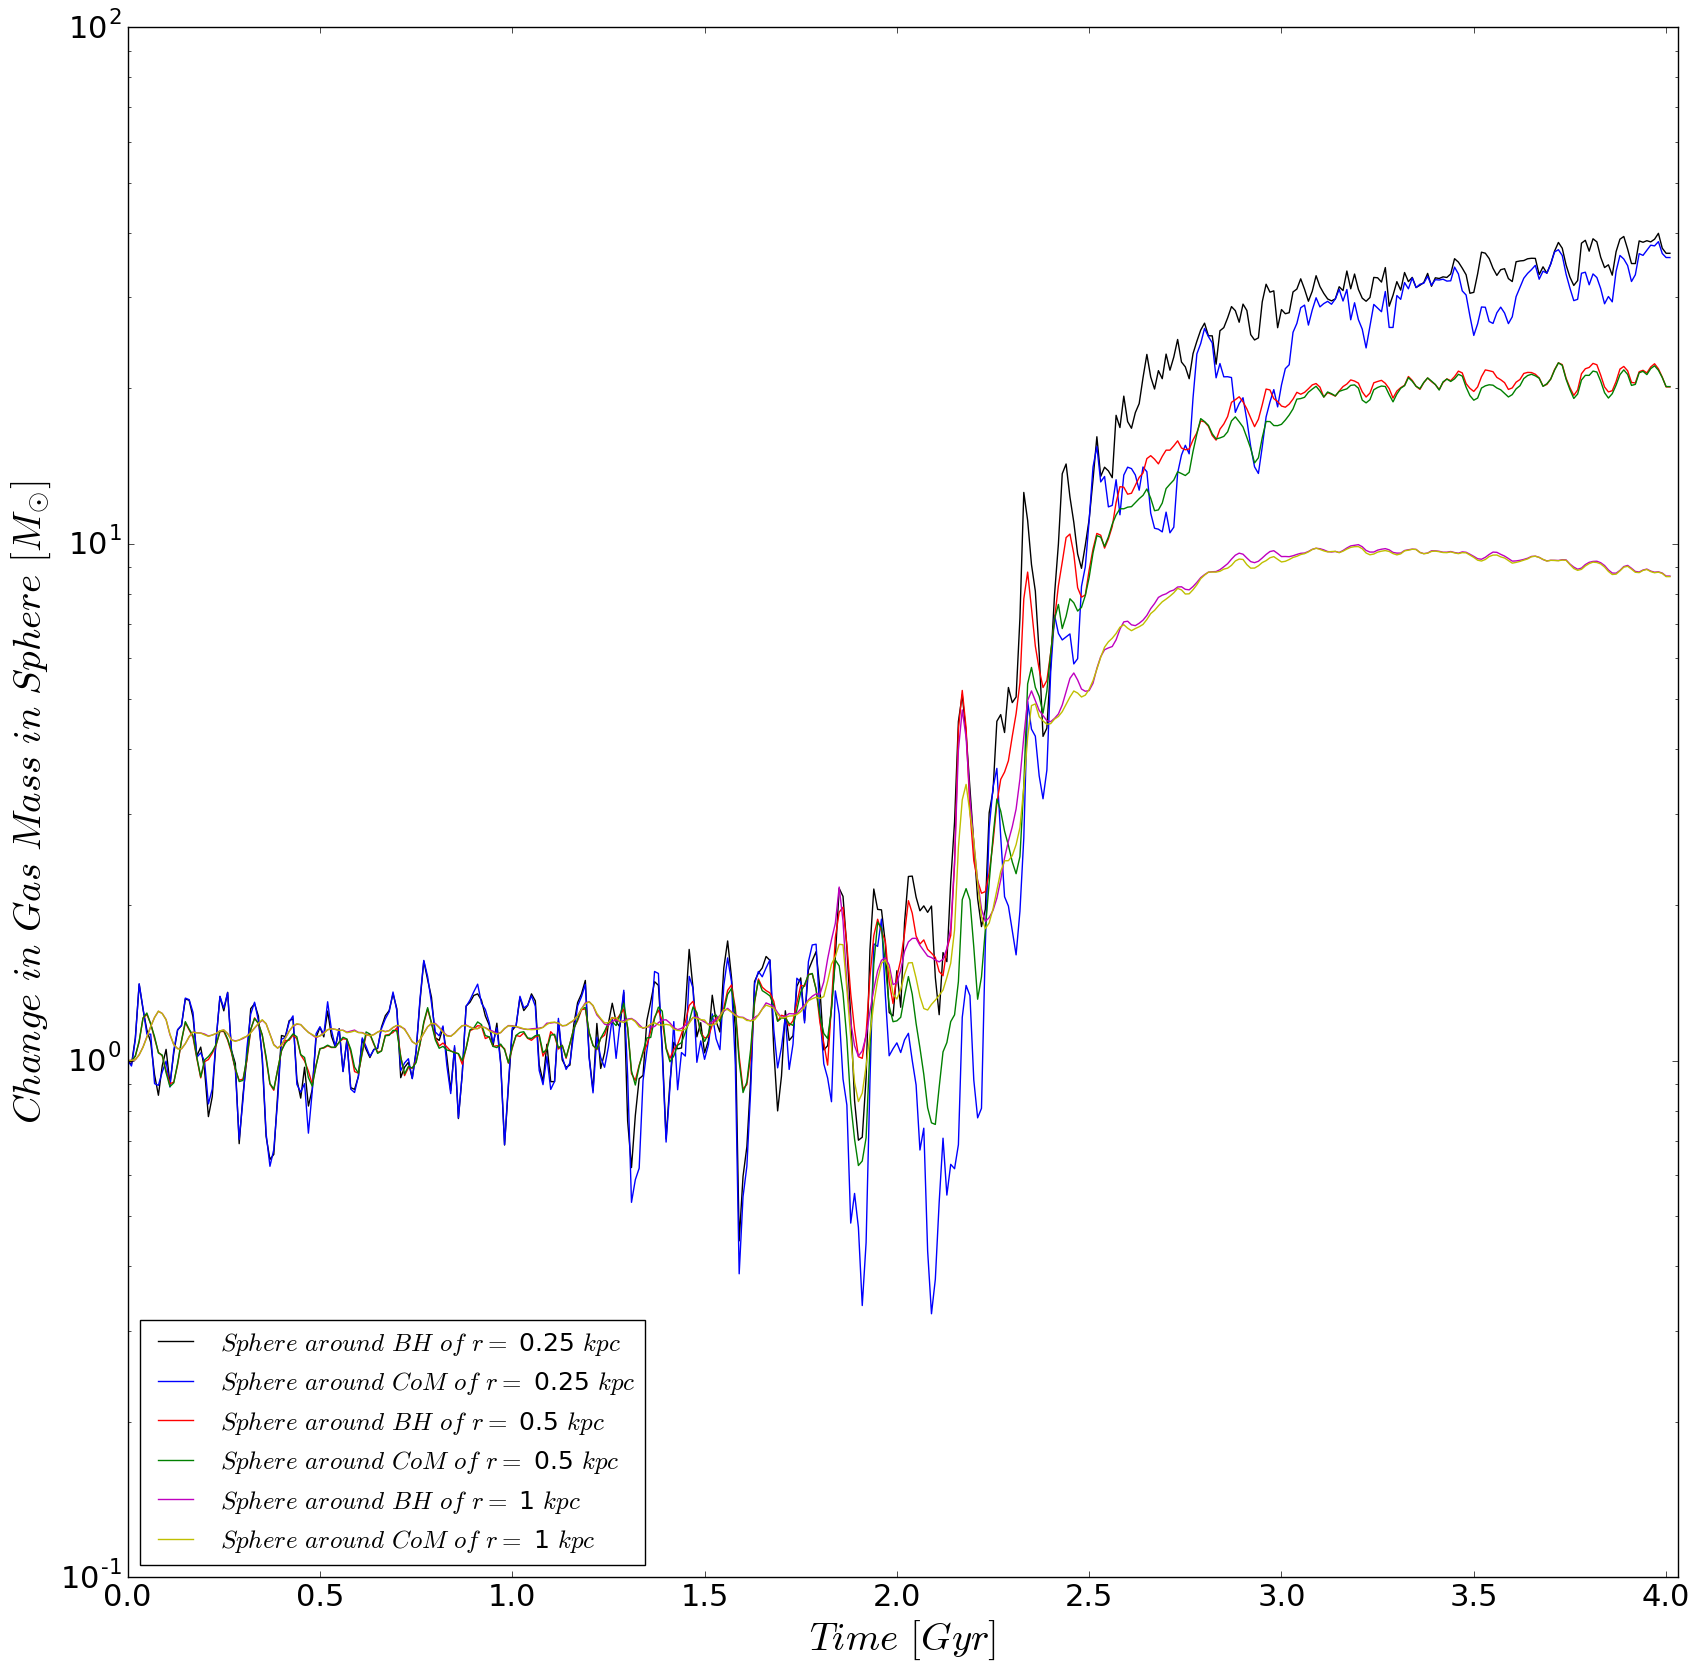

In [9]:
gasinatenthkpcbh = []
gasinatenthkpccm = []
gasinahalfkpcbh = []
gasinahalfkpccm = []
gasinakpcbh = []
gasinakpccm = []
bh = np.loadtxt('BHpositions.txt', usecols= [1,2,3])
cm = np.loadtxt('centerofmassgas.txt', usecols= [1,2,3])
end = 402.0
snap = np.arange(0.0,end)
for i in snap:
    filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/Merger/data/snapshot_%03d/snap_%03d.hdf5" %(i,i),'r')
    gas = filein['PartType0']
    g_positions = np.asarray(gas['Coordinates'])
    g_mass = np.asarray(gas['Mass'])
    g_positions = g_positions / 0.73
    g_mass = g_mass * 1e10 / 0.73
    dbh = Distance2(g_positions,(bh[i]/0.73))
    dcm = Distance2(g_positions,(cm[i]/0.73))
    g_massbh1 = g_mass[(dbh<1)]
    g_masscm1 = g_mass[(dcm<1)]
    g_massbh05 = g_mass[(dbh<0.5)]
    g_masscm05 = g_mass[(dcm<0.5)]
    g_massbh01 = g_mass[(dbh<0.25)]
    g_masscm01 = g_mass[(dcm<0.25)]

    
    gasinatenthkpcbh.append(np.sum(g_massbh01))
    gasinatenthkpccm.append(np.sum(g_masscm01))
    gasinahalfkpcbh.append(np.sum(g_massbh05))
    gasinahalfkpccm.append(np.sum(g_masscm05))
    gasinakpcbh.append(np.sum(g_massbh1))
    gasinakpccm.append(np.sum(g_masscm1))

    


gasinatenthkpcbh= np.asarray(gasinatenthkpcbh)  / gasinatenthkpcbh[0]
gasinatenthkpccm= np.asarray(gasinatenthkpccm) / gasinatenthkpccm[0]
gasinahalfkpcbh= np.asarray(gasinahalfkpcbh) / gasinahalfkpcbh[0]
gasinahalfkpccm= np.asarray(gasinahalfkpccm) / gasinahalfkpccm[0]
gasinakpcbh= np.asarray(gasinakpcbh) / gasinakpcbh[0]
gasinakpccm = np.asarray(gasinakpccm) / gasinakpccm[0]   
    
fig = plt.figure(figsize=(20,20))
plt.semilogy((snap/100),gasinatenthkpcbh,'k-',label='$Sphere$ $around$ $BH$ $of$ $r=$ 0.25 $kpc$')
plt.semilogy((snap/100),gasinatenthkpccm,'b-',label='$Sphere$ $around$ $CoM$ $of$ $r=$ 0.25 $kpc$')
plt.semilogy((snap/100),gasinahalfkpcbh,'r-',label='$Sphere$ $around$ $BH$ $of$ $r=$ 0.5 $kpc$')
plt.semilogy((snap/100),gasinahalfkpccm,'g-',label='$Sphere$ $around$ $CoM$ $of$ $r=$ 0.5 $kpc$')
plt.semilogy((snap/100),gasinakpcbh,'m-',label='$Sphere$ $around$ $BH$ $of$ $r=$ 1 $kpc$')
plt.semilogy((snap/100),gasinakpccm,'y-',label='$Sphere$ $around$ $CoM$ $of$ $r=$ 1 $kpc$')
plt.xlabel('$Time$ $[$$Gyr$$]$', fontsize=28)
plt.ylabel('$Change$ $in$ $Gas$ $Mass$ $in$ $Sphere$ $[M$$_{\odot}$$]$', fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.tick_params(axis='both', which='minor', labelsize=22)
plt.ticklabel_format(fontsize=20)
plt.xlim(0,4.03)
plt.legend(loc=3, prop={'size': 18})
plt.savefig('total_mass_in_sphere(gas)v1')

# Center of Mass of Gas with no BH

In [ ]:
end = 81.0
snap = np.arange(0.0,end)
blah = []
for x in (snap):
    if x == 0.0:
        filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/MergernoBH/data/snapshot_%03d/snap_%03d.hdf5" %(x,x),'r')
        header = filein['Header']
        stars = filein['PartType2']
        s_positions = np.asarray(stars['Coordinates'])
        s_mass = np.ones(500000)*(header.attrs.__getitem__('MassTable')[2])
        gas = filein['PartType0']
        g_positions = np.asarray(gas['Coordinates'])
        g_positions = g_positions / 0.73
        g_mass = np.asarray(gas['Mass'])
        Gcom = findCenterMass(g_positions,g_mass)
    else:
        filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/MergernoBH/data/snapshot_%03d/snap_%03d.hdf5" %(x,x),'r')
        header = filein['Header']
        stars = filein['PartType2']
        nstars = filein['PartType4']
        gas = filein['PartType0']
        g_positions = np.asarray(gas['Coordinates'])
        g_positions = g_positions / 0.73
        g_mass = np.asarray(gas['Mass'])
        s_positions = np.asarray(stars['Coordinates'])
        n_positions = np.asarray(nstars['Coordinates'])
        n_mass = np.asarray(nstars['Mass'])
        s_mass = np.ones(500000)*(header.attrs.__getitem__('MassTable')[2])
    
#         Gcom = findCenterMass(np.concatenate((s_positions,n_positions),axis=0),np.concatenate((s_mass,n_mass),axis=0))
        Gcom = findCenterMass(g_positions,g_mass)
    blah.append([x, Gcom[0], Gcom[1], Gcom[2]])

np.savetxt('centerofmassnobhgas.txt',blah , fmt = '%10.5f', header='snapshot x y z')

# Mass in a Sphere in different kpc ranges

/mnt/xfs1/scda_software/pkg/devel/python/2.7.12/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


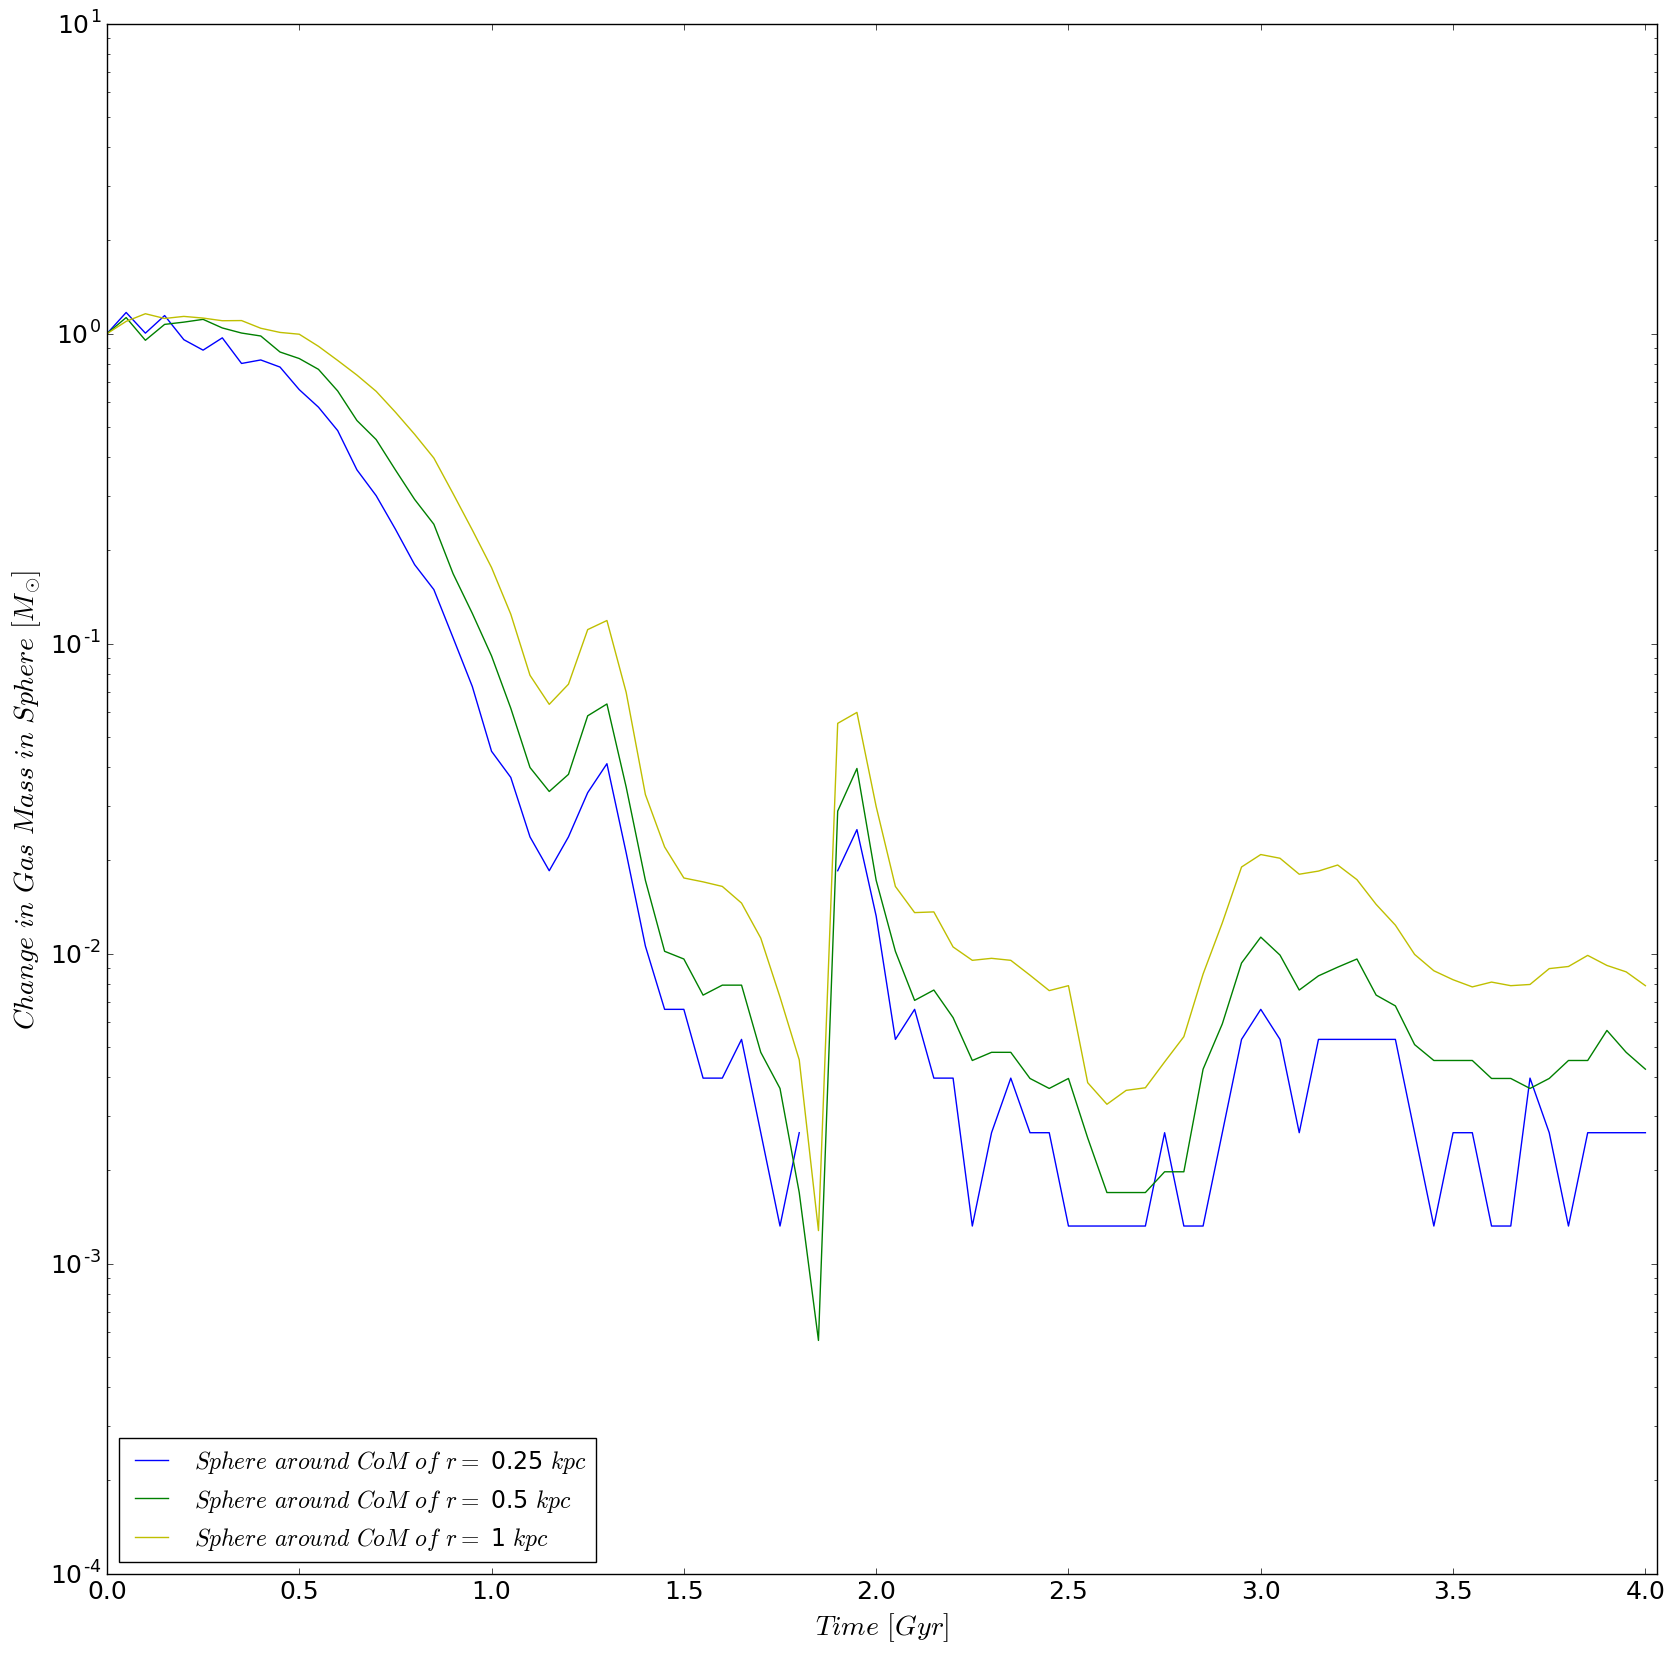

In [8]:
gasinatenthkpccm = []
gasinahalfkpccm = []
gasinakpccm = []
cm = np.loadtxt('centerofmassnobhgas.txt', usecols= [1,2,3])
end = 81.0
snap = np.arange(0.0,end)
for i in snap:
    filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/MergernoBH/data/snapshot_%03d/snap_%03d.hdf5" %(i,i),'r')
    gas = filein['PartType0']
    g_positions = np.asarray(gas['Coordinates'])
    g_mass = np.asarray(gas['Mass'])
    g_positions = g_positions / 0.73
    g_mass = g_mass * 1e10 / 0.73
    
    dcm = Distance2(g_positions,(cm[i]/0.73))
    g_masscm1 = g_mass[(dcm<1)]
    g_masscm05 = g_mass[(dcm<0.5)]
    g_masscm01 = g_mass[(dcm<0.25)]

    
    gasinatenthkpccm.append(np.sum(g_masscm01))
    gasinahalfkpccm.append(np.sum(g_masscm05))
    gasinakpccm.append(np.sum(g_masscm1))
    
gasinatenthkpccm= np.asarray(gasinatenthkpccm) / gasinatenthkpccm[0]
gasinahalfkpccm= np.asarray(gasinahalfkpccm) / gasinahalfkpccm[0]
gasinakpccm = np.asarray(gasinakpccm) / gasinakpccm[0]       
fig = plt.figure(figsize=(20,20))
plt.semilogy((snap/20),gasinatenthkpccm,'b-',label='$Sphere$ $around$ $CoM$ $of$ $r=$ 0.25 $kpc$')
plt.semilogy((snap/20),gasinahalfkpccm,'g-',label='$Sphere$ $around$ $CoM$ $of$ $r=$ 0.5 $kpc$')
plt.semilogy((snap/20),gasinakpccm,'y-',label='$Sphere$ $around$ $CoM$ $of$ $r=$ 1 $kpc$')
plt.xlabel('$Time$ $[$$Gyr$$]$', fontsize=20)
plt.ylabel('$Change$ $in$ $Gas$ $Mass$ $in$ $Sphere$ $[M$$_{\odot}$$]$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=18)
plt.ticklabel_format(fontsize=16)
plt.xlim(0,4.03)
plt.legend(loc=3, prop={'size': 17})
# plt.title()
plt.savefig('total_mass_in_sphere_nobh(gas)v1')

# CoM-BH Separation for Gas in Merger

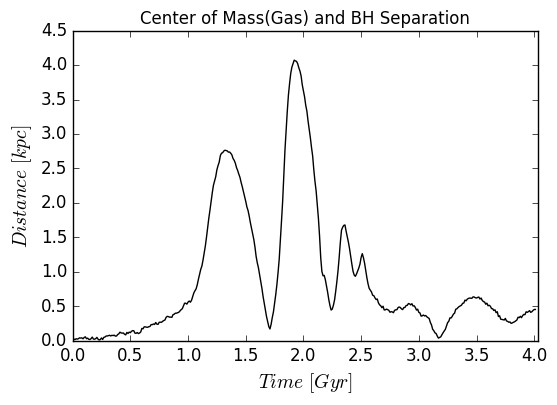

In [4]:
cm = np.loadtxt('centerofmassgas.txt',usecols=[1,2,3])
bh = np.loadtxt('BHpositions.txt',usecols=[1,2,3])
fig = plt.figure(figsize=(6,4))
snap = np.arange(0,402)
plt.plot((snap*1.0/100),(Distance((cm/0.73),(bh/0.73))),'k-',lw=1)
plt.xlim(0,4.03)
plt.xlabel('$Time$ $[Gyr]$', fontsize=14)
plt.ylabel('$Distance$ $[kpc]$', fontsize=14) #$between$ $Gas$ $CoM$ $and$ $BH$
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
# plt.ticklabel_format(fontsize=20)
plt.title('Center of Mass(Gas) and BH Separation')
plt.savefig('CoM_gas-BH Separation-Merger')

In [13]:
np.argmax(Distance((cm/0.73),(bh/0.73)))
print (Distance((cm/0.73),(bh/0.73)))[192]
print (Distance((cm/0.73),(bh/0.73)))[218]

4.07279724413
0.948479456012


# no BH Mass Weighted Histo

In [ ]:
end = 82.0
snap = np.arange(0.0,end)
for x in (snap):
    print x
    if x == 0.0:
        filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/MergernoBH/data/snapshot_%03d/snap_%03d.hdf5" %(x,x),'r')
        header = filein['Header']
        gas = filein['PartType0']
        stars = filein['PartType2']
        g_positions = np.asarray(gas['Coordinates'])
        s_positions = np.asarray(stars['Coordinates'])
        g_mass = np.asarray(gas['Mass'])
        s_mass = np.ones(500000)*(header.attrs.__getitem__('MassTable')[2])
#         BH = filein['PartType5']
        BH_positions = np.loadtxt('BHpositions.txt', usecols=[1,2,3])
        sfr2 = np.asarray(gas['StarFormationRate'])
        gx = g_positions[:,0] / 0.73
        gy = g_positions[:,1] / 0.73
        gz = g_positions[:,2] / 0.73
        pos = g_positions
        sfr = sfr2[(sfr2>0)]
        pos = pos[(sfr2>0)] - findCenterMass(np.concatenate((s_positions,g_positions),axis=0),np.concatenate((s_mass,g_mass),axis=0))
        bhx = BH_positions[0,0] / 0.73
        bhy = BH_positions[0,1] / 0.73
        bhz = BH_positions[0,2] / 0.73
        sx = s_positions[:,0] / 0.73
        sy = s_positions[:,1] / 0.73
        sz = s_positions[:,2] / 0.73
        px = pos[:,0] / 0.73
        py = pos[:,1] / 0.73
        pz = pos[:,2] / 0.73

        
#######################################################################################################################        

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10

        
        # Plot 2D histogram using pcolor, pcolormesh shows actual edges
        
        fig = plt.figure(figsize=(20,20))
        gs = gridspec.GridSpec(2, 2)

        H, xedges, yedges = np.histogram2d(gx,gy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= g_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(221)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4,vmax=-1.8))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
#         plt.xlim(-40,40)
#         plt.ylim(-40,40)
        plt.title('Gas', fontsize=25,x=1.08, y=1.02)
#         plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
#                     textcoords='offset points', ha='center', va='bottom',
#                     bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
#                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                                     color='red'))
        plt.text(2,11,r'$t=$'+str(((x*10)/200))+'Gyrs', fontsize = 25)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('$Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
#         font_size = 20 # Adjust as appropriate.
#         cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10
        
        
        H, xedges, yedges = np.histogram2d(gx,gz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights = g_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(222)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4,vmax=-1.8))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.title('Gas', fontsize=25,x=1.08, y=1.02)
#         plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
#                     textcoords='offset points', ha='center', va='bottom',
#                     bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
#                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                                     color='red'))
        plt.text(2,11,r'$t=$'+str(((x*10)/200))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Mass$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10
        
        G, xedges, yedges = np.histogram2d(sx,sy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights = s_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(223)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4,vmax=-1.8))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
        plt.title('Stars', fontsize=25,x=1.08, y=1.02)
#         plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
#                     textcoords='offset points', ha='center', va='bottom',
#                     bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
#                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                                     color='red'))
        plt.text(4,9,r'$t=$'+str(((x*10)/200))+'Gyrs', fontsize = 25)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('$Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
#         font_size = 20 # Adjust as appropriate.
#         cbar.ax.tick_params(labelsize=font_size)      
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10   
        G, xedges, yedges = np.histogram2d(sx,sz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= s_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(224)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4,vmax=-1.8))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.title('Stars', fontsize=25, y=1.02)
#         plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
#                     textcoords='offset points', ha='center', va='bottom',
#                     bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
#                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                                     color='red'))
        plt.text(2.5,9,r'$t=$'+str(((x*10)/200))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Mass$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################        
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.15)
        number = '%03d'%x
        plt.savefig('binfile'+number+'.png')
    else:
        filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/MergernoBH/data/snapshot_%03d/snap_%03d.hdf5" %(x,x),'r')
    
        header = filein['Header']
        gas = filein['PartType0']
        stars = filein['PartType2']
        nstars = filein['PartType4']
        g_positions = np.asarray(gas['Coordinates'])
        s_positions = np.asarray(stars['Coordinates'])
        n_positions = np.asarray(nstars['Coordinates'])
        g_mass = np.asarray(gas['Mass'])
        n_mass = np.asarray(nstars['Mass'])
        s_mass = np.ones(500000)*(header.attrs.__getitem__('MassTable')[2])
#         BH = filein['PartType5']
#         BH_positions = np.asarray(BH['Coordinates'])
        sfr2 = np.asarray(gas['StarFormationRate'])

        BH_positions = np.loadtxt('BHpositions.txt', usecols=[1,2,3])
#         bhx = BH_positions[0,0] / 0.73
#         bhy = BH_positions[0,1] / 0.73
#         bhz = BH_positions[0,2] / 0.73
    
        Gcom = findCenterMass(s_positions,s_mass)
        
        s_positions = s_positions - Gcom
        BH_positions = BH_positions - Gcom
        n_positions = n_positions - findCenterMass(n_positions,n_mass)
        pos = g_positions
        g_positions = g_positions - findCenterMass(g_positions,g_mass)
        pos = pos[(sfr2>0)] - findCenterMass(np.concatenate((s_positions,g_positions),axis=0),np.concatenate((s_mass,g_mass),axis=0))
        
        bhx = BH_positions[x,0] / 0.73
        bhy = BH_positions[x,1] / 0.73
        bhz = BH_positions[x,2] / 0.73
        gx = g_positions[:,0] / 0.73
        gy = g_positions[:,1] / 0.73
        gz = g_positions[:,2] / 0.73
        sx = s_positions[:,0] / 0.73
        sy = s_positions[:,1] / 0.73
        sz = s_positions[:,2] / 0.73
        nx = n_positions [:,0] / 0.73
        ny = n_positions [:,1] / 0.73
        nz = n_positions[:,2] / 0.73
        px = pos[:,0] / 0.73
        py = pos[:,1] / 0.73
        pz = pos[:,2] / 0.73
        
        
        starry = np.concatenate((s_positions,n_positions), axis=0) - findCenterMass(np.concatenate((s_positions,n_positions),axis=0),np.concatenate((s_mass,n_mass),axis=0))
        starryx = starry[:,0]
        starryy = starry[:,1]
        starryz = starry[:,2]
        
        fig = plt.figure(figsize=(20,20))
        
#######################################################################################################################        

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10

        
        # Plot 2D histogram using pcolor, pcolormesh shows actual edges
        
        fig = plt.figure(figsize=(20,20))
        gs = gridspec.GridSpec(2, 2)

        H, xedges, yedges = np.histogram2d(gx,gy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= g_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(221)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4,vmax=-1.8))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
#         plt.xlim(-40,40)
#         plt.ylim(-40,40)
        plt.title('Gas', fontsize=25,x=1.08, y=1.02)
#         plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
#                     textcoords='offset points', ha='center', va='bottom',
#                     bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
#                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                                     color='red'))
        plt.text(2,11,r'$t=$'+str(((x*10)/200))+'Gyrs', fontsize = 25)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('$Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
#         font_size = 20 # Adjust as appropriate.
#         cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10
        
        
        H, xedges, yedges = np.histogram2d(gx,gz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights = g_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(222)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4,vmax=-1.8))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.title('Gas', fontsize=25,x=1.08, y=1.02)
#         plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
#                     textcoords='offset points', ha='center', va='bottom',
#                     bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
#                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                                     color='red'))
        plt.text(2,11,r'$t=$'+str(((x*10)/200))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Mass$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10
        
        G, xedges, yedges = np.histogram2d(starryx,starryy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights = np.concatenate((s_mass,n_mass),axis=0))
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(223)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4,vmax=-1.8))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
        plt.title('Stars', fontsize=25,x=1.08, y=1.02)
#         plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
#                     textcoords='offset points', ha='center', va='bottom',
#                     bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
#                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                                     color='red'))
        plt.text(4,9,r'$t=$'+str(((x*10)/200))+'Gyrs', fontsize = 25)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('$Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
#         font_size = 20 # Adjust as appropriate.
#         cbar.ax.tick_params(labelsize=font_size)      
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10   
        G, xedges, yedges = np.histogram2d(starryx,starryz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= np.concatenate((s_mass,n_mass),axis=0))
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(224)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4,vmax=-1.8))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.title('Stars', fontsize=25, y=1.02)
#         plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
#                     textcoords='offset points', ha='center', va='bottom',
#                     bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
#                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                                     color='red'))
        plt.text(2.5,9,r'$t=$'+str(((x*10)/200))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Mass$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################        
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.15)
        number = '%03d'%x
        plt.savefig('binfile'+number+'.png')

# no BH SFR Weighted Histo

In [ ]:
end = 82.0
snap = np.arange(0.0,end)
for x in (snap):
    print x
    if x == 0.0:
        filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/MergernoBH/data/snapshot_%03d/snap_%03d.hdf5" %(x,x),'r')
        header = filein['Header']
        gas = filein['PartType0']
        stars = filein['PartType2']
        g_positions = np.asarray(gas['Coordinates'])
        s_positions = np.asarray(stars['Coordinates'])
        g_mass = np.asarray(gas['Mass'])
        s_mass = np.ones(500000)*(header.attrs.__getitem__('MassTable')[2])
        BH = filein['PartType5']
        BH_positions = np.asarray(BH['Coordinates'])
        sfr2 = np.asarray(gas['StarFormationRate'])
        gx = g_positions[:,0] / 0.73
        gy = g_positions[:,1] / 0.73
        gz = g_positions[:,2] / 0.73
        pos = g_positions
        sfr = sfr2[(sfr2>0)]
        pos = pos[(sfr2>0)] - findCenterMass(np.concatenate((s_positions,g_positions),axis=0),np.concatenate((s_mass,g_mass),axis=0))
        bhx = BH_positions[:,0] / 0.73
        bhy = BH_positions[:,1] / 0.73
        bhz = BH_positions[:,2] / 0.73
        sx = s_positions[:,0] / 0.73
        sy = s_positions[:,1] / 0.73
        sz = s_positions[:,2] / 0.73
        px = pos[:,0] / 0.73
        py = pos[:,1] / 0.73
        pz = pos[:,2] / 0.73

        
#######################################################################################################################        

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10

        
        # Plot 2D histogram using pcolor, pcolormesh shows actual edges
        
        fig = plt.figure(figsize=(20,20))
        gs = gridspec.GridSpec(2, 2)

        H, xedges, yedges = np.histogram2d(gx,gy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= sfr2)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(221)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-4.8, vmax=-1.2))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
#         plt.xlim(-15,15)
#         plt.ylim(-15,15)
        plt.title('Gas', fontsize=29,x=1.07, y=1.02)
#         plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
#                     textcoords='offset points', ha='center', va='bottom',
#                     bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
#                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                                     color='red'))
        plt.text(2,7,r'$t=$'+str(((x*10)/200))+'Gyrs', fontsize = 25)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('$log$ $SFR$ $per$ $kpc$ $^{2}$', fontsize= 28)
#         font_size = 20 # Adjust as appropriate.
#         cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10
        
        
        H, xedges, yedges = np.histogram2d(gx,gz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights = sfr2)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(222)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-4.8, vmax=-1.2))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.xlim(-15,15)
#         plt.ylim(-15,15)
#         plt.title('Gas', fontsize=25, y=1.02)
#         plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
#                     textcoords='offset points', ha='center', va='bottom',
#                     bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
#                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                                     color='red'))
        plt.text(2,7,r'$t=$'+str(((x*10)/200))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $SFR$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10
        
        G, xedges, yedges = np.histogram2d(gx,gy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= g_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(223)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4, vmax=-2.2))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
#         plt.title('Gas', fontsize=25, x=1.08, y=1.02)
#         plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
#                     textcoords='offset points', ha='center', va='bottom',
#                     bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
#                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                                     color='red'))
        plt.text(7,10.5,r'$t=$'+str(((x*10)/200))+'Gyrs', fontsize = 25)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('$Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
#         font_size = 20 # Adjust as appropriate.
#         cbar.ax.tick_params(labelsize=font_size)      
# #######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10  
        
        G, xedges, yedges = np.histogram2d(gx,gz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= g_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(224)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4, vmax=-2.2))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.title('Stars(SFR Weighted)', fontsize=25, y=1.02)
#         plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
#                     textcoords='offset points', ha='center', va='bottom',
#                     bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
#                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                                     color='red'))
        plt.text(7,10.5,r'$t=$'+str(((x*10)/200))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Mass$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################        
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.15)
#         fig.tight_layout()
        number = '%03d'%x
        plt.savefig('sfrbinfile'+number+'.png')
    else:
        filein = h5.File("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/MergernoBH/data/snapshot_%03d/snap_%03d.hdf5" %(x,x),'r')
    
        header = filein['Header']
        gas = filein['PartType0']
        stars = filein['PartType2']
        nstars = filein['PartType4']
        g_positions = np.asarray(gas['Coordinates'])
        s_positions = np.asarray(stars['Coordinates'])
        n_positions = np.asarray(nstars['Coordinates'])
        g_mass = np.asarray(gas['Mass'])
        n_mass = np.asarray(nstars['Mass'])
        s_mass = np.ones(500000)*(header.attrs.__getitem__('MassTable')[2])
        BH = filein['PartType5']
        BH_positions = np.asarray(BH['Coordinates'])
        sfr2 = np.asarray(gas['StarFormationRate'])
    
        Gcom = findCenterMass(s_positions,s_mass)
        
        s_positions = s_positions - Gcom
        BH_positions = BH_positions - Gcom
        n_positions = n_positions - findCenterMass(n_positions,n_mass)
        pos = g_positions
        g_positions = g_positions - findCenterMass(g_positions,g_mass)
        pos = pos[(sfr2>0)] - findCenterMass(np.concatenate((s_positions,g_positions),axis=0),np.concatenate((s_mass,g_mass),axis=0))
        
        bhx = BH_positions[:,0] / 0.73
        bhy = BH_positions[:,1] / 0.73
        bhz = BH_positions[:,2] / 0.73
        gx = g_positions[:,0] / 0.73
        gy = g_positions[:,1] / 0.73
        gz = g_positions[:,2] / 0.73
        sx = s_positions[:,0] / 0.73
        sy = s_positions[:,1] / 0.73
        sz = s_positions[:,2] / 0.73
        nx = n_positions [:,0] / 0.73
        ny = n_positions [:,1] / 0.73
        nz = n_positions[:,2] / 0.73
        px = pos[:,0] / 0.73
        py = pos[:,1] / 0.73
        pz = pos[:,2] / 0.73
        
        
        starry = np.concatenate((s_positions,n_positions), axis=0) - findCenterMass(np.concatenate((s_positions,n_positions),axis=0),np.concatenate((s_mass,n_mass),axis=0))
        starryx = starry[:,0]
        starryy = starry[:,1]
        starryz = starry[:,2]
        
        fig = plt.figure(figsize=(20,20))
        
#######################################################################################################################                
   
        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10

        
        # Plot 2D histogram using pcolor, pcolormesh shows actual edges
        
        fig = plt.figure(figsize=(20,20))
        gs = gridspec.GridSpec(2, 2)

        H, xedges, yedges = np.histogram2d(gx,gy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= sfr2)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(221)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-4.8, vmax=-1.2))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
#         plt.xlim(-15,15)
#         plt.ylim(-15,15)
        plt.title('Gas', fontsize=29,x=1.07, y=1.02)
#         plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
#                     textcoords='offset points', ha='center', va='bottom',
#                     bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
#                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                                     color='red'))
        plt.text(2,7,r'$t=$'+str(((x*10)/200))+'Gyrs', fontsize = 25)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('$log$ $SFR$ $per$ $kpc$ $^{2}$', fontsize= 28)
#         font_size = 20 # Adjust as appropriate.
#         cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10
        
        
        H, xedges, yedges = np.histogram2d(gx,gz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights = sfr2)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        H = H*(1.0/binarea)
        H = np.rot90(H)
        H = np.flipud(H)
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero 
        Hmasked = np.log10(Hmasked)
        
        plt.subplot(222)
        plt.pcolormesh(xedges,yedges,Hmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-4.8, vmax=-1.2))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.xlim(-15,15)
#         plt.ylim(-15,15)
#         plt.title('Gas', fontsize=25, y=1.02)
#         plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
#                     textcoords='offset points', ha='center', va='bottom',
#                     bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
#                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                                     color='red'))
        plt.text(2,7,r'$t=$'+str(((x*10)/200))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $SFR$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)       
#######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10
        
        G, xedges, yedges = np.histogram2d(gx,gy,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= g_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(223)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4, vmax=-2.2))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$y$ $positions$ $in$ $kpc$', size = 28)
#         plt.title('Stars', fontsize=25, x=1.07, y=1.02)
#         plt.annotate('BH', xy=(bhx, bhy), xytext=(-20,111), fontsize=20, 
#                     textcoords='offset points', ha='center', va='bottom',
#                     bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
#                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                                     color='red'))
        plt.text(7,10.5,r'$t=$'+str(((x*10)/200))+'Gyrs', fontsize = 25)
#         cbar = plt.colorbar()
#         cbar.ax.set_ylabel('$Number$ $of$ $Particles$ $per$ $kpc$ $^{2}$', fontsize= 28)
#         font_size = 20 # Adjust as appropriate.
#         cbar.ax.tick_params(labelsize=font_size)      
# #######################################################################################################################                

        nbins = 200
        xmin = -10
        xmax = 10
        ymin = -10
        ymax = 10  
        
        G, xedges, yedges = np.histogram2d(gx,gz,bins=nbins, range=[[xmin, xmax],[ymin, ymax]], weights= g_mass)
        binarea = (xmax-xmin)*1./nbins * (ymax-ymin)*1./nbins
        G = G*(1.0/binarea)
        G = np.rot90(G)
        G = np.flipud(G)
        Gmasked = np.ma.masked_where(G==0,G) # Mask pixels with a value of zero 
        Gmasked = np.log10(Gmasked)
        
        plt.subplot(224)
        plt.pcolormesh(xedges,yedges,Gmasked,norm=colors.SymLogNorm(linthresh=1, linscale=1, vmin=-5.4, vmax=-2.2))
        plt.xlabel('$x$ $positions$ $in$ $kpc$', size = 28)
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.tick_params(axis='both', which='minor', labelsize=22)
        plt.ylabel('$z$ $positions$ $in$ $kpc$', size = 28)
#         plt.title('Stars(SFR Weighted)', fontsize=25, y=1.02)
#         plt.annotate('BH', xy=(bhx, bhz), xytext=(-20,111), fontsize=20, 
#                     textcoords='offset points', ha='center', va='bottom',
#                     bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.7),
#                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
#                                     color='red'))
        plt.text(7,10.5,r'$t=$'+str(((x*10)/200))+'Gyrs', fontsize = 25)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('$log$ $Mass$ $per$ $kpc$ $^{2}$', fontsize= 28)
        font_size = 20 # Adjust as appropriate.
        cbar.ax.tick_params(labelsize=font_size)
#######################################################################################################################        
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.15)
#         fig.tight_layout()
        number = '%03d'%x
        plt.savefig('sfrbinfile'+number+'.png')

In [ ]:
filein0 = np.loadtxt("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/MergernoBH/data/sfr.txt", usecols=[0,2])
filein1 = np.loadtxt("/mnt/ceph/users/tstarkenburg/BH-DATA/forJonathan/Merger/data/sfr.txt", usecols=[0,2])

sfrnobh = filein0[:,1]
nobhtime = filein0[:,0]
sfrbh = filein1[:,1]
bhtime = filein1[:,0]
nobhtime = (nobhtime/0.73)
bhtime = (bhtime/0.73)

nobhmaxsfr = sfrnobh.argmax(axis=0)
bhmaxsfr = sfrbh.argmax(axis=0)


fig = plt.figure(figsize=(12,12))
plt.semilogy(nobhtime,sfrnobh,'m-', lw = 1, label='Merger w/o BH')
plt.semilogy(bhtime,sfrbh,'y-', lw = 1, label='Merger w/ BH')
plt.xlabel('Time $[Gyr]$', fontsize = 18)
plt.ylabel('SFR $[M_{\odot}$ $yr^{-1}]$', fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=17)
plt.tick_params(axis='both', which='minor', labelsize=17)
plt.xlim(-0.1,4.2)
plt.annotate('$max$ $SFR$ $without$ $BH$ $at$ $time$ $:$'+str(nobhtime[nobhmaxsfr]), xy=(nobhtime[nobhmaxsfr], max(sfrnobh)),xytext=(1.5,3e-2), fontsize=13, 
              ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7),
             arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=-0.1', color='black'))
plt.annotate('$max$ $SFR$ $with$ $BH$ $at$ $time$ $:$'+str(bhtime[bhmaxsfr]), xy=(bhtime[bhmaxsfr], max(sfrbh)),xytext=(3,5e-2), fontsize=13, 
              ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5',color='black'))
plt.legend(loc=4, prop={'size' : 18})
plt.savefig('SFR-Merger')